In [1]:
from Tratamiento import Tratamiento
from IPython.display import display, HTML
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
"""display(HTML(
<style>
.output {
    display: flex;

align-items: center;
    text-align: center;
        }
</style>
))"""

from datetime import datetime


def date_to_milis(day, month, year):
    date = str(day) + '-' + str(month) + '-' + str(year)
    dt_obj = datetime.strptime(date,'%d.%m.%Y')
    millisec = dt_obj.timestamp() * 1000
    return millisec

def milis_to_date(milis):
    return datetime.fromtimestamp(milis/1000.0).strftime('%d-%m-%Y')

def get_month_from_milis(milis):
    date = datetime.fromtimestamp(milis/1000.0)
    return date.month

In [2]:
datos = Tratamiento('xmissu.xlsx')

In [3]:
summoner_name = datos.df_player_data['name'][0]
accountId = datos.df_player_data['accountId'][0]

<center><h1>Evolución KDA</h1><center>

In [4]:
#def get_stats_evolution_month():

df_stats = datos.df_participants[datos.df_participants['participant_account_id'] == accountId].sort_values('gameId', ascending=False).reset_index()
columna = datos.df_games_list.sort_values('gameId', ascending=False).reset_index()
df_stats['timestamp'] = columna['timestamp']
df_stats['timestamp'] = df_stats['timestamp'].apply(lambda row: get_month_from_milis(row)) 

df_month_stats = df_stats[0:0]
max_month = df_stats.loc[0, 'timestamp']

for i in range(1, max_month + 1):
    df_month = df_stats[df_stats['timestamp'] == i]
    num_games = len(df_month)
    df_month = df_month.groupby(['timestamp']).sum().reset_index()
    df_month_stats.loc[i] = df_month.loc[0]
    df_month_stats.loc[i, 'month'] = i
    df_month_stats.loc[i, 'num_games'] = num_games
    df_month_stats.loc[i, 'KDA'] = (df_month_stats.loc[i, 'kills'] + df_month_stats.loc[i, 'assists']) / df_month_stats.loc[i, 'deaths']
    df_month_stats.loc[i, 'avg_kills'] = df_month_stats.loc[i, 'kills'] / num_games
    df_month_stats.loc[i, 'avg_deaths'] = df_month_stats.loc[i, 'deaths'] / num_games
    df_month_stats.loc[i, 'avg_assists'] = df_month_stats.loc[i, 'assists'] / num_games
    
arra = np.array(df_month_stats['avg_kills'])

plt.plot(arra)
plt.show
    
df_month_stats[['kills', 'deaths', 'assists', 'avg_kills', 'avg_deaths', 'avg_assists', 'month', 'num_games', 'KDA']]

,kills,deaths,assists,avg_kills,avg_deaths,avg_assists,month,num_games,KDA
1,1225.0,1096.0,1630.0,5.468750,4.892857,7.276786,1.0,224.0,2.604927
2,1721.0,1498.0,2084.0,5.833898,5.077966,7.064407,2.0,295.0,2.540053
3,1014.0,1079.0,1574.0,4.630137,4.926941,7.187215,3.0,219.0,2.398517
4,1025.0,987.0,1272.0,5.000000,4.814634,6.204878,4.0,205.0,2.327254
5,1652.0,1466.0,1809.0,5.900000,5.235714,6.460714,5.0,280.0,2.360846


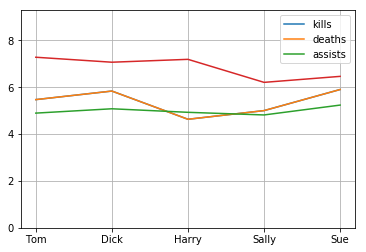

In [5]:
plt.plot(np.array(df_month_stats['avg_kills']))
plt.plot(np.array(df_month_stats['avg_deaths']))
plt.plot(np.array(df_month_stats['avg_assists']))
plt.ylim(ymin=0)
plt.ylim(ymax=max(df_month_stats['avg_assists']) + 2)
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
plt.legend(['kills','deaths','assists'])
plt.show()

In [6]:
#pd.options.display.max_seq_items = 2000
#datos.df_participants.columns

<center><h1>{{summoner_name}} ({{accountId}})</h1><center>

<center><h1>Best Champions</h1><center>

In [7]:
df = datos.GetChampsWinRate()
df = df[['ChampName','ganadas','perdidas','%', 'kda']].head(5)
df.columns = ['Champion', 'Wins', 'Losses', 'WinRate', 'KDA']
display(HTML(df.to_html(index=False)))

LoweringError: Failed at object (object mode frontend)
Failed at object (object mode backend)
[33m[1m[33m[1mmake_function(name=$const132.26, code=<code object <lambda> at 0x107dbf930, file "/Users/Gonzalo/Desktop/LOL DataScience/Tratamiento.py", line 139>, closure=$132.24, defaults=None)
[37m[1m
File "Tratamiento.py", line 139:[0m
[34m[1m    def GetChampsWinRate(self):
        <source elided>
        best_champs['%'] = round(best_champs['ganadas'] * 100 / (best_champs['ganadas'] + best_champs['perdidas']), 1)
[31m[1m        best_champs['kda'] = best_champs['championId'].apply(lambda row: self.get_kda_champion(row))
[0m        [32m[1m^[0m[0m[0m
[0m[37m[1m[1] During: lowering "$132.27 = make_function(name=$const132.26, code=<code object <lambda> at 0x107dbf930, file "/Users/Gonzalo/Desktop/LOL DataScience/Tratamiento.py", line 139>, closure=$132.24, defaults=None)" at /Users/Gonzalo/Desktop/LOL DataScience/Tratamiento.py (139)[0m
-------------------------------------------------------------------------------
This should not have happened, a problem has occurred in Numba's internals.

Please report the error message and traceback, along with a minimal reproducer
at: https://github.com/numba/numba/issues/new

If you need help writing a minimal reproducer please see:
http://matthewrocklin.com/blog/work/2018/02/28/minimal-bug-reports

If more help is needed please feel free to speak to the Numba core developers
directly at: https://gitter.im/numba/numba

Thanks in advance for your help in improving Numba!


<center><h1>Worst enemies</h1><center>

In [8]:
df_worst_enemies = datos.get_most_loss_against_champ()
df_worst_enemies = df_worst_enemies[['key','derrotas']].head(5)
df_worst_enemies.columns = ['Champion', 'Defeats']
display(HTML(df_worst_enemies.to_html(index=False)))

Champion,Defeats
Ezreal,85
Tristana,84
Janna,81
Camille,69
Caitlyn,68


<center><h1>Win Rate</h1><center>

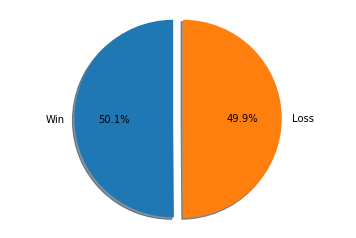

In [9]:
labels = 'Win', 'Loss'
sizes = np.array(datos.get_win_loss_games())
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
display(fig1)